✅ 输出形状: torch.Size([1, 1, 512, 512])
🧠 模型总参数量: 22,575,873


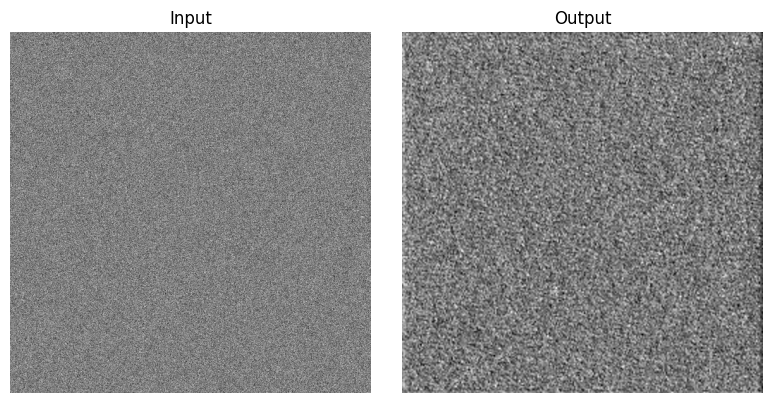

In [1]:
# 📦 1. 基础导入
import sys
sys.path.append("D:/junbo/rcan_code")
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import numpy as np

# ✅ 导入你的模型（假设你的模块目录为 my_model）
from models.msaukan import *

# 🧪 2. 初始化模型
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = MSA_UKAN(in_channels=1, img_size=512).to(device)
model.eval()  # 推理模式

# 🏗️ 3. 构造一个 512x512 的灰度图输入
dummy_input = torch.randn(1, 1, 512, 512).to(device)  # batch size = 1

# 🔄 4. 前向传播
with torch.no_grad():
    output = model(dummy_input)

print("✅ 输出形状:", output.shape)  # 应为 (1, 1, 512, 512)

# 📊 5. 模型参数总量统计
total_params = sum(p.numel() for p in model.parameters())
print(f"🧠 模型总参数量: {total_params:,}")

# 📷 6. 可视化输出图像（tanh 输出范围为 -1 到 1）
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.imshow(dummy_input[0, 0].cpu().numpy(), cmap='gray')
plt.title("Input")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(output[0, 0].cpu().numpy(), cmap='gray')
plt.title("Output")
plt.axis("off")

plt.tight_layout()
plt.show()


In [2]:
import sys
sys.path.append("D:/junbo/rcan_code")  # 替换成你的项目根路径

from models.msaukan import MSA_UKAN

import torch
import torch.nn as nn
import numpy as np

# ✅ 设置设备
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# ✅ 构建模型
model = MSA_UKAN(in_channels=1, img_size=512).to(device)
model.eval()  # 切换到推理模式

# ✅ 构造假输入和目标
input_tensor = torch.randn(1, 1, 512, 512).to(device)
target_tensor = torch.randn(1, 1, 512, 512).to(device)

# ✅ 使用一个简单的 loss function
criterion = nn.SmoothL1Loss()

with torch.no_grad():
    output = model(input_tensor)

    # 👀 输出 NaN 检查
    print("🔍 检查输入是否有NaN:", torch.isnan(input_tensor).any().item())
    print("🔍 检查输出是否有NaN:", torch.isnan(output).any().item())

    loss = criterion(output, target_tensor)
    print("🎯 Loss 值:", loss.item())
    print("🔍 Loss 是否为 NaN:", torch.isnan(loss).item())


🔍 检查输入是否有NaN: False
🔍 检查输出是否有NaN: False
🎯 Loss 值: 0.42954134941101074
🔍 Loss 是否为 NaN: False
